# Проект Продвинутые расчеты и визуализация
#  «Аналитика клиентов и логов gamedev-стартапа»

In [1]:
import pandas as pd 


In [2]:
user_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-daniil-kljuvak-pcp-fbf69/5les_hw/5_user_data[1].csv')
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-daniil-kljuvak-pcp-fbf69/5les_hw/5_logs[1].csv')


In [3]:
user_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [4]:
logs.head()



,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


#### Определите, какой клиент или клиенты дали наибольшее количество успешных ответов. Перечислите их идентификаторы 


In [5]:
logs.query('success == True')


,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772
...,...,...,...,...
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121


In [6]:
loges = logs.loc[logs['success']==True].client.value_counts()



In [7]:
loges.max()



41

In [8]:
logs_d = logs.loc[logs["success"]==True]



In [9]:
loges.loc[loges == 41].index.sort_values()



Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

#### Выясните, с какой платформы было дано наибольшее количество успешных ответов

In [10]:
logs.query('success == True')



,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772
...,...,...,...,...
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121


In [11]:
logs.platform.value_counts()



phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

#### Определите, какая платформа пользуется наибольшей популярностью среди премиум-клиентов.

In [12]:
df = logs.merge(user_data, on='client')



In [13]:
df.head()



,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [14]:
df.query('premium==True')



,client,success,platform,time,premium,age
42,35604,False,phone,1585459894,True,65
49,11983,True,phone,1585459511,True,68
52,99308,True,computer,1585409409,True,38
59,49625,False,phone,1585447789,True,65
64,53978,True,computer,1585408637,True,46
...,...,...,...,...,...,...
3376,20278,True,computer,1585456706,True,65
3399,78455,True,phone,1585459854,True,23
3401,57026,True,computer,1585438120,True,62
3418,2864,True,phone,1585459818,True,41


In [15]:
we = df.platform.value_counts()



#### Cтрою график, демонстрирующий количество ответов премиум-клиентов на каждой платформе. 

In [17]:
ag = df.query('premium==True').value_counts('platform')
ag


platform
phone       246
computer    150
tablet       24
dtype: int64

In [18]:
import matplotlib.pyplot as plt



<BarContainer object of 3 artists>

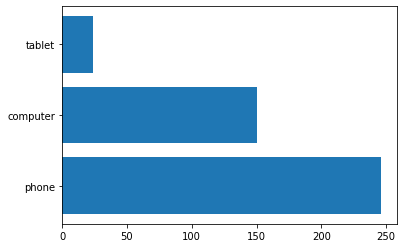

In [19]:
plt.barh(ag.index, ag.values)



## Шаг 7

#### Анализирую у какой категории клиентов доля неуспешных ответов выше?


In [20]:
resp = df.groupby(['premium', 'success'], as_index = False).agg({'client': 'count'})
resp


,premium,success,client
0,False,False,775
1,False,True,2244
2,True,False,117
3,True,True,303


In [21]:
new_data = resp.pivot(index = 'premium', columns = 'success', values = 'client') \
    .rename(columns={True: 'success', False: 'unsuccess'})
new_data


success,unsuccess,success
premium,,
False,775,2244
True,117,303


In [22]:
ss = new_data['unsuccess_percentage'] = (new_data['unsuccess'] / (new_data['success'] + new_data['unsuccess'])) * 100



Text(0, 0.5, 'usual')

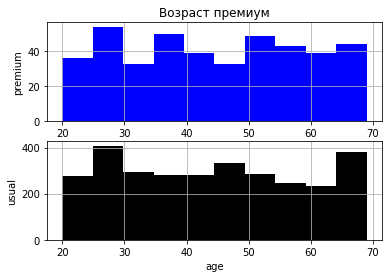

In [23]:
plt.subplot(2, 1, 1)
plt.hist(df.loc[df['premium'] == True, 'age'], bins=10, color='blue')
plt.grid(True)
plt.title('Возраст премиум')
plt.xlabel('age')
plt.ylabel('premium')
plt.subplot(2, 1, 2)
plt.hist(df.loc[df['premium'] == False, 'age'], bins=10, color='black')
plt.grid(True)
plt.xlabel('age')
plt.ylabel('usual')

#### Строю график, отражающий распределение количества успешных ответов на пользователя.

In [25]:
series = logs.query('success == True').client.value_counts()



In [26]:
series_1 = series.rename('suces')



In [27]:
import seaborn as sns



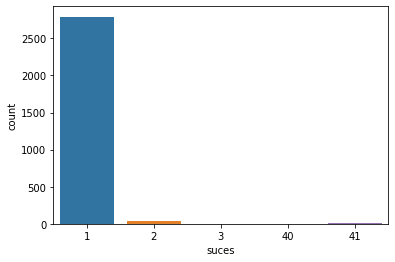

In [28]:
sns.countplot(x = series_1)



#### Визуализирую, клиенты какого возраста на компьютере дали наибольшее количество успешных ответов.

In [29]:
a = logs.query('success==True and platform=="computer"')



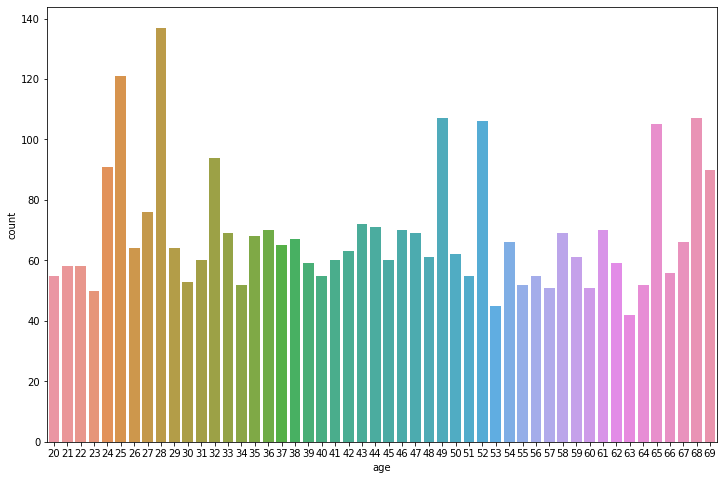

In [30]:
plt.figure(figsize=(12, 8))
sns.countplot(data = df, x = 'age')

